# Finite Square Well
Demonstration of the "graphical method" for solving the eigenstates of the finite square well.

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# constants
hbar = 1
mass = 1
half_width = 1 # usually called a
well_depth = 2.75 # usually called V0

In [3]:
# derived values
z0 = np.sqrt(2*mass*well_depth)*hbar/half_width
print(z0)

2.345207879911715


In [4]:
# number of solutions for z
num_z = int(z0*2/np.pi)+1
print(num_z)

2


In [5]:
# the two equations in form blah == 0
tan_eq = lambda x: x * np.tan(x) - np.sqrt(z0**2 - x**2)
cot_eq = lambda x: -x / np.tan(x) - np.sqrt(z0**2 - x**2)

In [6]:
# find the solutions
z = np.zeros(num_z) # initialize array
for i in range(num_z):
    if i % 2 == 0: # odd solution
        bracket_min = i//2*np.pi
        bracket_max = min(z0,(i//2+0.5)*np.pi)
        sol = opt.root_scalar(tan_eq, bracket=(bracket_min,bracket_max))
    else: # even solution
        bracket_min = (i//2+0.5)*np.pi
        bracket_max = min(z0,(i//2+1)*np.pi)
        sol = opt.root_scalar(cot_eq, bracket=(bracket_min,bracket_max))
    z[i] = sol.root
print(z)

[1.08825373 2.06480875]


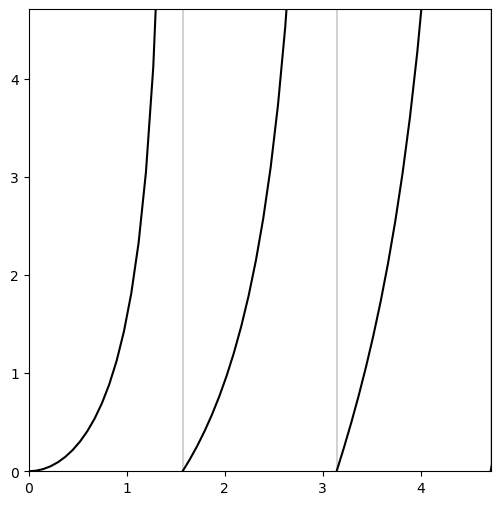

In [7]:
# graph of blank "graphical method"
fig, ax = plt.subplots(figsize=(8,6))
z_periods = 1.5 # multiples of pi for the graph (integer)
z_max = z_periods*np.pi
for p in range(int(z_periods+0.5)):
    tan_range = np.linspace(p*np.pi,(p+0.5)*np.pi,num=21,endpoint=False)
    cot_range = np.linspace((p+0.5)*np.pi,(p+1)*np.pi,num=21,endpoint=False)
    plt.plot(tan_range, tan_range*np.tan(tan_range),'k')
    plt.plot(cot_range, -cot_range/np.tan(cot_range),'k')
    plt.vlines([(p+0.5)*np.pi,(p+1)*np.pi],0,z_max,'k',lw=0.25)
plt.ylim(0,z_max)
plt.xlim(0,z_max)
ax.set_aspect('equal','box')
#plt.savefig('FSW.svg')

Text(0.5, 1.0, 'Finite square well solution for z0=2.345')

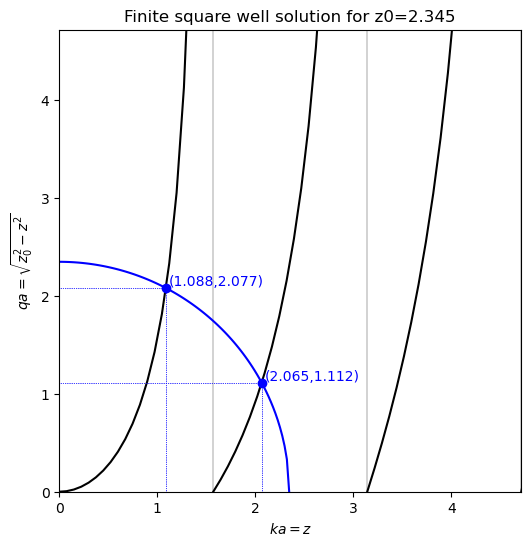

In [8]:
# graph of completed "graphical method"
fig, ax = plt.subplots(figsize=(8,6))
z_periods = 1.5 # multiples of pi for the graph (integer)
z_max = z_periods*np.pi
z_range = np.linspace(0,z0,num=101)
for p in range(int(z_periods+0.5)): # plot the tan and cot curves
    tan_range = np.linspace(p*np.pi,(p+0.5)*np.pi,num=21,endpoint=False)
    cot_range = np.linspace((p+0.5)*np.pi,(p+1)*np.pi,num=21,endpoint=False)
    plt.plot(tan_range, tan_range*np.tan(tan_range),'k')
    plt.plot(cot_range, -cot_range/np.tan(cot_range),'k')
    plt.vlines([(p+0.5)*np.pi,(p+1)*np.pi],0,z_max,'k',lw=0.25)
plt.plot(z_range,np.sqrt(z0**2-z_range**2),'b') # plot the circle
plt.plot(z,np.sqrt(z0**2-z**2),'bo')
for thisz in z:
    plt.vlines(z,0,np.sqrt(z0**2-z**2),'b',ls=':', lw=0.5)
    plt.hlines(np.sqrt(z0**2-z**2),0,z,'b',ls=':', lw=0.5)
    plt.annotate(f'({thisz:.3f},{np.sqrt(z0**2-thisz**2):.3f})',
                 (thisz,np.sqrt(z0**2-thisz**2)), color='b',
                 xytext=(2,2),textcoords='offset points')
plt.ylim(0,z_max)
plt.xlim(0,z_max)
ax.set_aspect('equal','box')
plt.xlabel(r'$ka=z$')
plt.ylabel(r'$qa=\sqrt{z_0^2-z^2}$')
plt.title(f"Finite square well solution for z0={z0:.3f}")
#plt.savefig('FSW.svg')

## TODO
* Calculate the energies and wavefunctions
* Plot the energies and wavefunctions